# Simulation of the Ising modell for zero field

## setup

In [1]:
include("../src/ising.jl")
import CairoMakie as plt
using JLD2

## Simulation
Warning: Only run this section if you want to generate new data. This will take a long time.

In [2]:
J = 1.0
grid_sizes = [10, 12, 14, 16, 18, 20, 22]

7-element Vector{Int64}:
 10
 12
 14
 16
 18
 20
 22

In [3]:
energies, magnetisations, temps = [], [], []
for grid_size in grid_sizes
    @info "Running simulation for grid size $grid_size"
    energies_, magnetisations_, temps_ = temp_sweep(grid_size=grid_size,T_Start=4.2,T_End=4.8,T_Steps=100,J=J,initial_up_prob=0.7, N_Sample=5000)
    push!(energies, energies_)
    push!(magnetisations, magnetisations_)
    push!(temps, temps_)
end

┌ Info: Running simulation for grid size 10
└ @ Main /home/user/emil.steiner/Documents/code/CoPhy3/ex02/notebooks/simulate_grid_sizes.ipynb:3
Iterating over temperature... 100%|██████████████████████| Time: 0:01:26
┌ Info: Running simulation for grid size 12
└ @ Main /home/user/emil.steiner/Documents/code/CoPhy3/ex02/notebooks/simulate_grid_sizes.ipynb:3
Iterating over temperature... 100%|██████████████████████| Time: 0:02:26
┌ Info: Running simulation for grid size 14
└ @ Main /home/user/emil.steiner/Documents/code/CoPhy3/ex02/notebooks/simulate_grid_sizes.ipynb:3
Iterating over temperature... 100%|██████████████████████| Time: 0:03:53
┌ Info: Running simulation for grid size 16
└ @ Main /home/user/emil.steiner/Documents/code/CoPhy3/ex02/notebooks/simulate_grid_sizes.ipynb:3
Iterating over temperature... 100%|██████████████████████| Time: 0:05:50
┌ Info: Running simulation for grid size 18
└ @ Main /home/user/emil.steiner/Documents/code/CoPhy3/ex02/notebooks/simulate_grid_sizes.ipynb:

In [4]:
save("../data/finite_size_scaling_large.jld2", "grid_sizes", grid_sizes, "energies", energies, "magnetisations", magnetisations, "temps", temps)

## plot simulated data

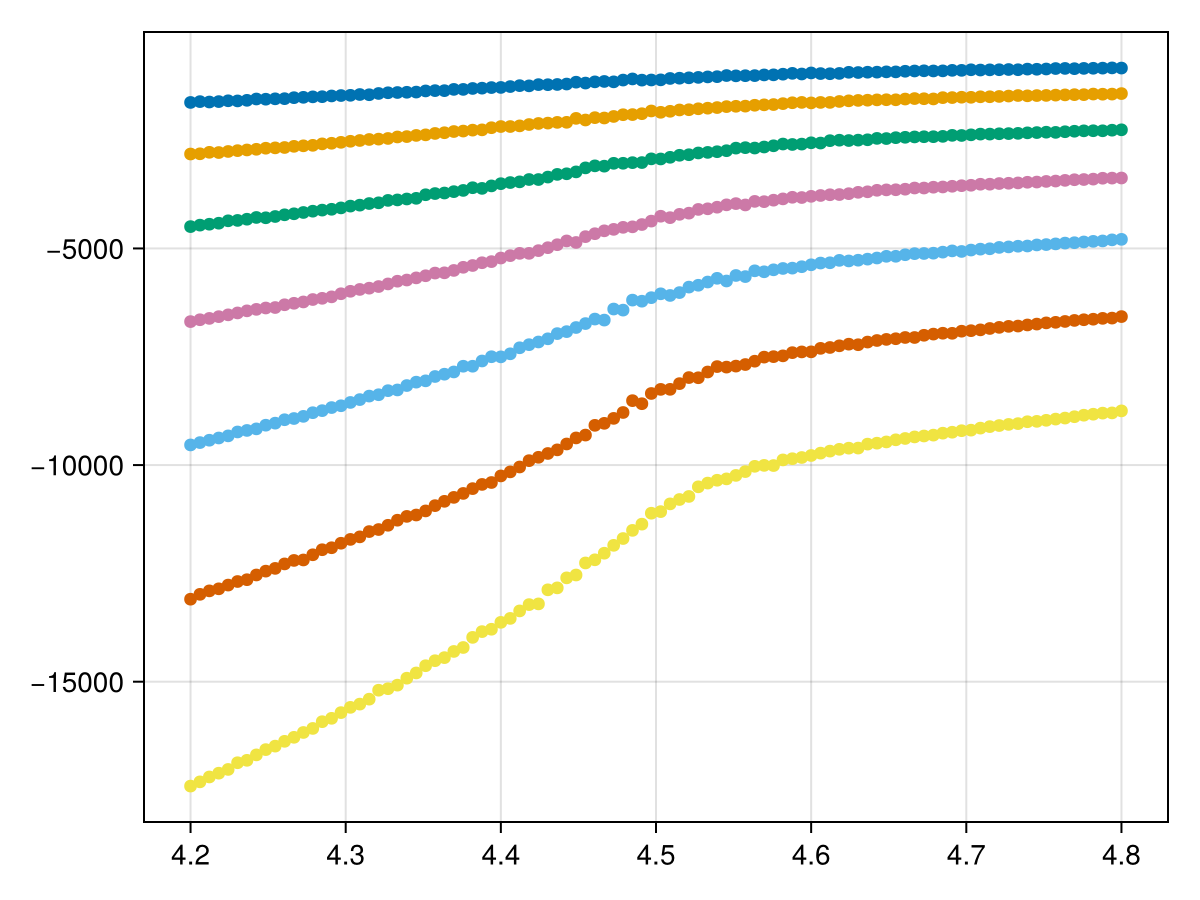

In [5]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, energies_, temps_) in zip(grid_sizes, energies, temps)
    plt.plot!(ax, temps_, energies_[1], label="L = $grid_size")
end
fig

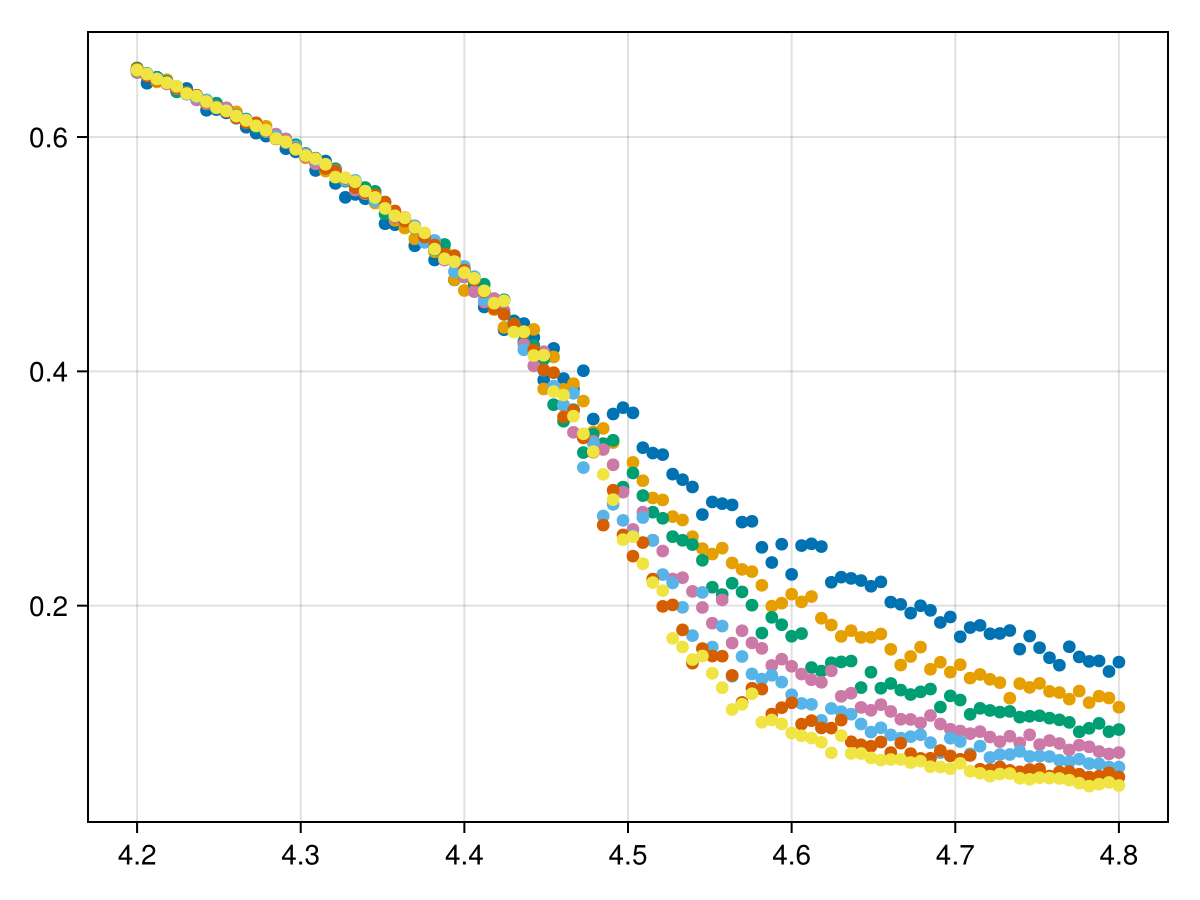

In [6]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    plt.plot!(ax, temps_, magnetisations_[1], label="L = $grid_size")
end
fig

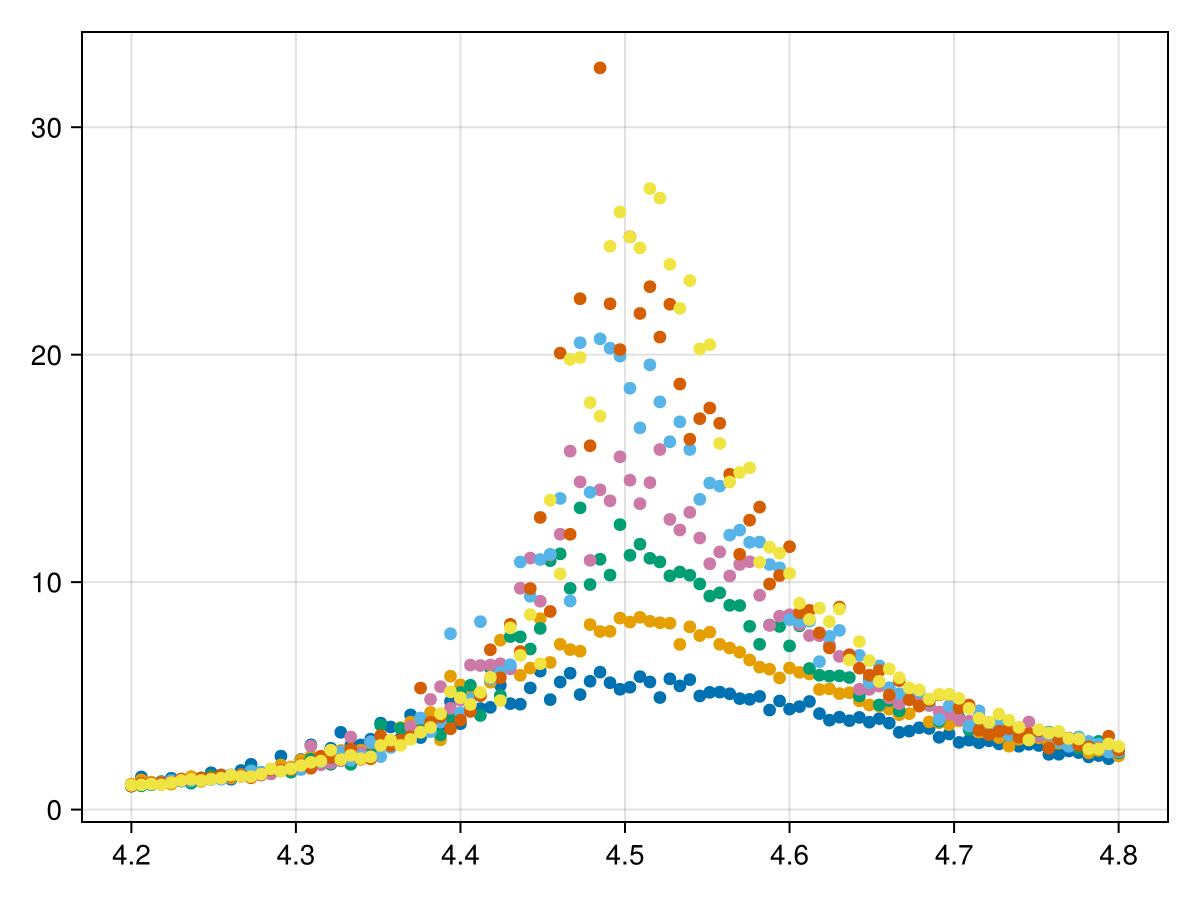

In [7]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    susceptibilities = magnetisations_[2] .^2 ./ temps_ * grid_size^3
    plt.plot!(temps_, susceptibilities, label="L = $grid_size")
end
fig